# Heart Failure Prediction

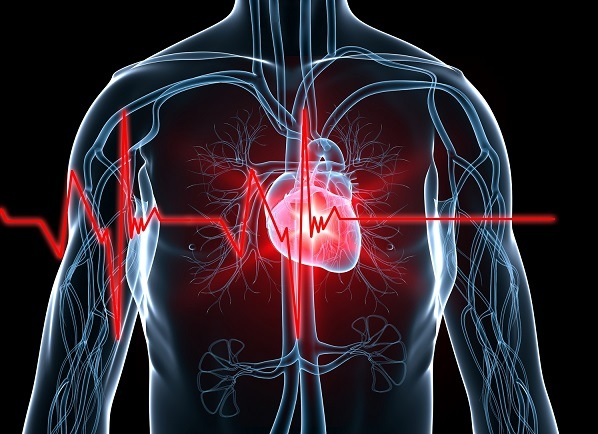

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


## Data summary

In [4]:
df.shape

(299, 13)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Exploratory data analysis

### DEATH_EVENT

In [9]:
df.DEATH_EVENT.value_counts(normalize=True).to_frame()

,DEATH_EVENT
0,0.67893
1,0.32107


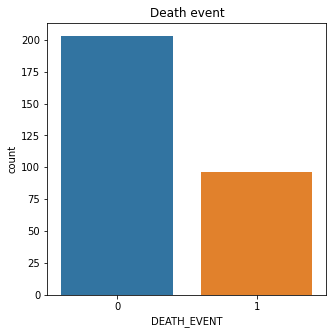

In [10]:
plt.figure(figsize=(5,5))
plt.title('Death event')
sns.countplot(df.DEATH_EVENT)

### Age

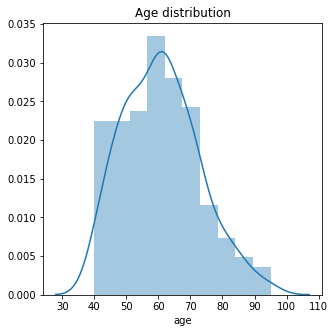

In [11]:
plt.figure(figsize=(5,5))
plt.title('Age distribution')
sns.distplot(df.age)

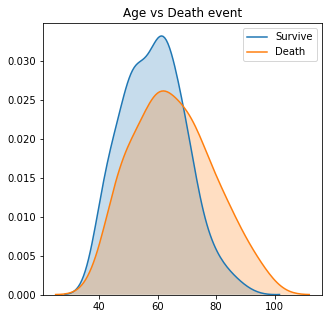

In [12]:
plt.figure(figsize=(5,5))
plt.title('Age vs Death event')
plot = sns.kdeplot(df.age.loc[df.DEATH_EVENT==0], shade=True, label='Survive')
plot = sns.kdeplot(df.age.loc[df.DEATH_EVENT==1], shade=True, label='Death')

### Anaemia

In [13]:
df.anaemia.value_counts(normalize=True).to_frame()

,anaemia
0,0.568562
1,0.431438


In [14]:
df.groupby(df.anaemia).DEATH_EVENT.mean().to_frame()

,DEATH_EVENT
anaemia,
0,0.294118
1,0.356589


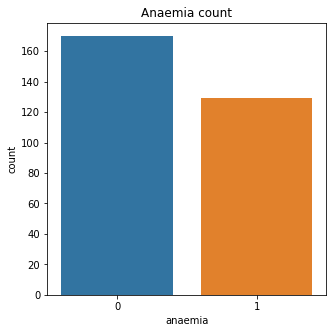

In [15]:
plt.figure(figsize=(5,5))
plt.title('Anaemia count')
sns.countplot(df.anaemia)

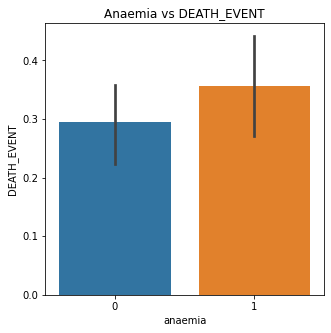

In [16]:
plt.figure(figsize=(5,5))
plt.title('Anaemia vs DEATH_EVENT')
sns.barplot(df.anaemia, df.DEATH_EVENT)

### Creatinine phosphokinase

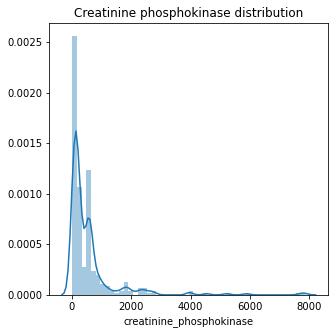

In [17]:
plt.figure(figsize=(5,5))
plt.title('Creatinine phosphokinase distribution')
sns.distplot(df.creatinine_phosphokinase)

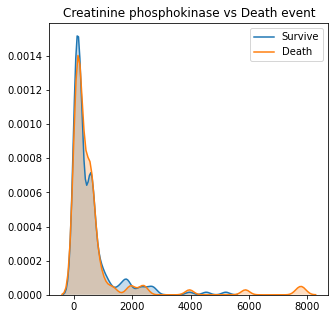

In [18]:
plt.figure(figsize=(5,5))
plt.title('Creatinine phosphokinase vs Death event')
plot = sns.kdeplot(df.creatinine_phosphokinase.loc[df.DEATH_EVENT==0], shade=True, label='Survive')
plot = sns.kdeplot(df.creatinine_phosphokinase.loc[df.DEATH_EVENT==1], shade=True, label='Death')

### Diabetes

In [19]:
df.diabetes.value_counts(normalize=True).to_frame()

,diabetes
0,0.58194
1,0.41806


In [20]:
df.groupby(df.diabetes).DEATH_EVENT.mean().to_frame()

,DEATH_EVENT
diabetes,
0,0.321839
1,0.320000


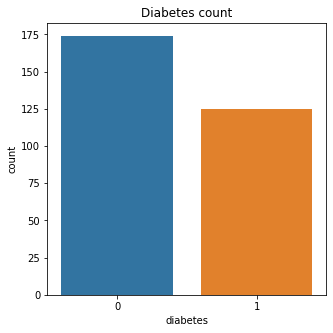

In [21]:
plt.figure(figsize=(5,5))
plt.title('Diabetes count')
sns.countplot(df.diabetes)

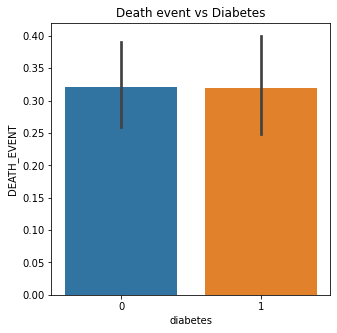

In [22]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Diabetes')
sns.barplot(df.diabetes, df.DEATH_EVENT)

### Ejection fraction

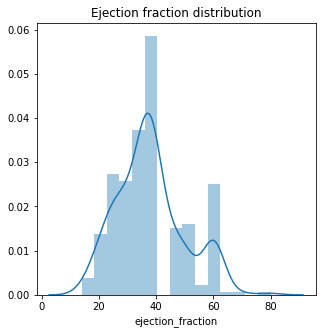

In [23]:
plt.figure(figsize=(5,5))
plt.title('Ejection fraction distribution')
sns.distplot(df.ejection_fraction)

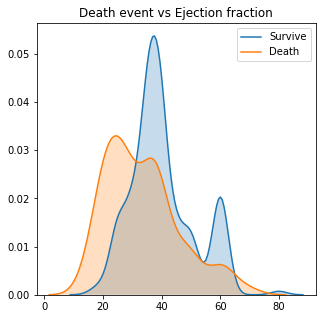

In [24]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Ejection fraction')
plot = sns.kdeplot(df.ejection_fraction.loc[df.DEATH_EVENT==0], shade=True, label='Survive')
plot = sns.kdeplot(df.ejection_fraction.loc[df.DEATH_EVENT==1], shade=True, label='Death')

### Platelets

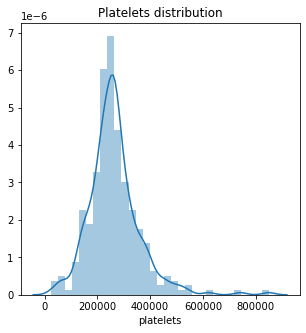

In [25]:
plt.figure(figsize=(5,5))
plt.title('Platelets distribution')
sns.distplot(df.platelets)

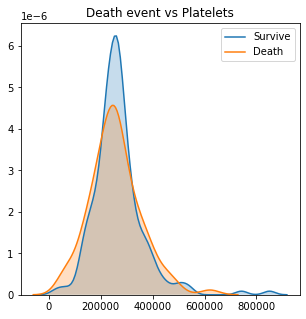

In [26]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Platelets')
plot = sns.kdeplot(df.platelets.loc[df.DEATH_EVENT==0], shade=True, label='Survive')
plot = sns.kdeplot(df.platelets.loc[df.DEATH_EVENT==1], shade=True, label='Death')

### Serum creatinine

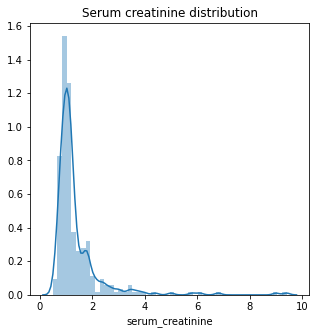

In [27]:
plt.figure(figsize=(5,5))
plt.title('Serum creatinine distribution')
sns.distplot(df.serum_creatinine)

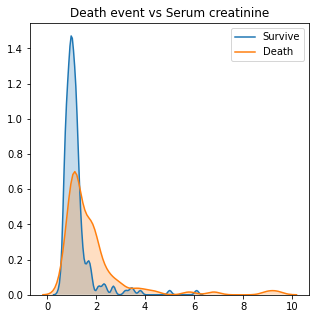

In [28]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Serum creatinine')
plot = sns.kdeplot(df.serum_creatinine.loc[df.DEATH_EVENT==0], shade=True, label='Survive')
plot = sns.kdeplot(df.serum_creatinine.loc[df.DEATH_EVENT==1], shade=True, label='Death')

### Serum sodium

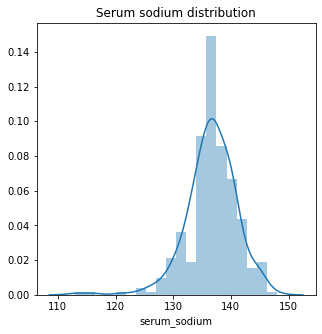

In [29]:
plt.figure(figsize=(5,5))
plt.title('Serum sodium distribution')
sns.distplot(df.serum_sodium)

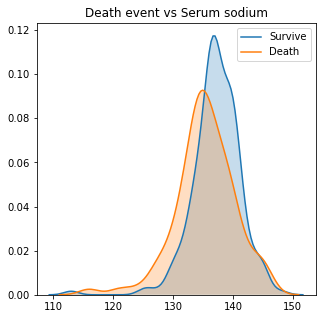

In [30]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Serum sodium')
plot = sns.kdeplot(df.serum_sodium.loc[df.DEATH_EVENT==0], shade=True, label='Survive')
plot = sns.kdeplot(df.serum_sodium.loc[df.DEATH_EVENT==1], shade=True, label='Death')

### Time

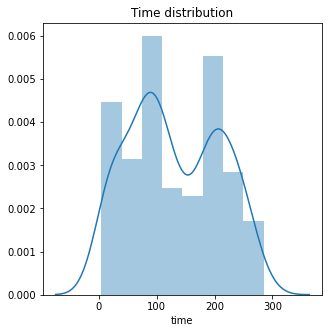

In [31]:
plt.figure(figsize=(5,5))
plt.title('Time distribution')
sns.distplot(df.time)

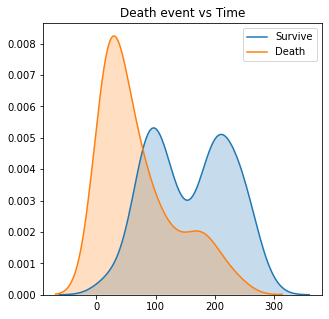

In [32]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Time')
plot = sns.kdeplot(df.time.loc[df.DEATH_EVENT==0], shade=True, label='Survive')
plot = sns.kdeplot(df.time.loc[df.DEATH_EVENT==1], shade=True, label='Death')

### High blood pressure

In [33]:
df.high_blood_pressure.value_counts(normalize=True).to_frame()

,high_blood_pressure
0,0.648829
1,0.351171


In [34]:
df.groupby(df.high_blood_pressure).DEATH_EVENT.mean().to_frame()

,DEATH_EVENT
high_blood_pressure,
0,0.293814
1,0.371429


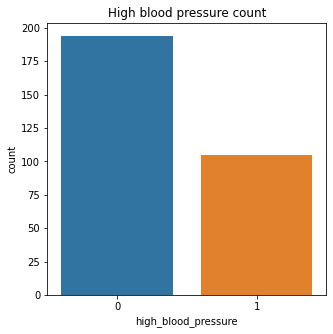

In [35]:
plt.figure(figsize=(5,5))
plt.title('High blood pressure count')
sns.countplot(df.high_blood_pressure)

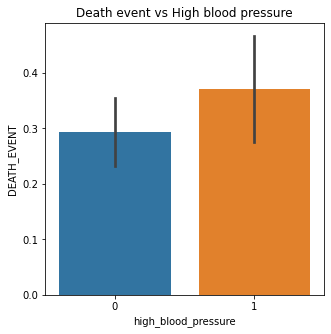

In [36]:
plt.figure(figsize=(5,5))
plt.title('Death event vs High blood pressure')
sns.barplot(df.high_blood_pressure, df.DEATH_EVENT)

### Sex

In [37]:
df.sex.value_counts(normalize=True).to_frame()

,sex
1,0.648829
0,0.351171


In [38]:
df.groupby(df.sex).DEATH_EVENT.mean().to_frame()

,DEATH_EVENT
sex,
0,0.323810
1,0.319588


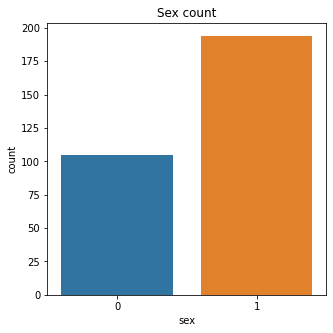

In [39]:
plt.figure(figsize=(5,5))
plt.title('Sex count')
sns.countplot(df.sex)

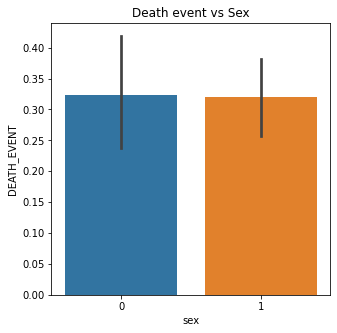

In [40]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Sex')
sns.barplot(df.sex, df.DEATH_EVENT)

### Smoking

In [41]:
df.smoking.value_counts(normalize=True).to_frame()

,smoking
0,0.67893
1,0.32107


In [42]:
df.groupby(df.smoking).DEATH_EVENT.mean().to_frame()

,DEATH_EVENT
smoking,
0,0.325123
1,0.312500


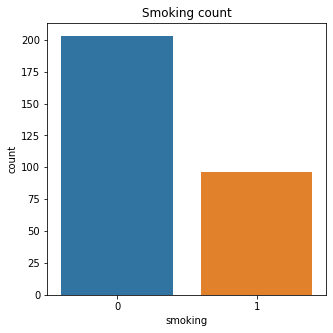

In [43]:
plt.figure(figsize=(5,5))
plt.title('Smoking count')
sns.countplot(df.smoking)

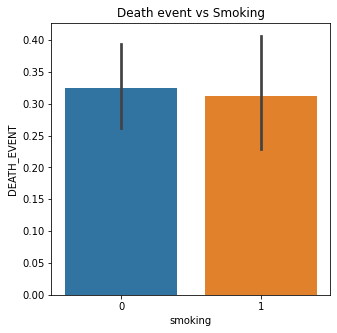

In [44]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Smoking')
sns.barplot(df.smoking, df.DEATH_EVENT)

## Feature engineering

### Age

In [45]:
df['senior_citizen'] = df.age.map(lambda x : 1 if x>70 else 0)

In [46]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,senior_citizen
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0


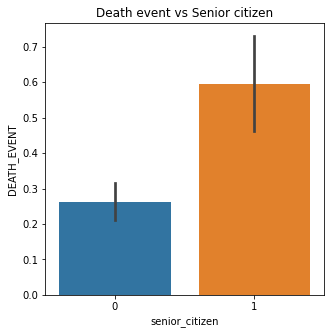

In [47]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Senior citizen')
sns.barplot(df.senior_citizen, df.DEATH_EVENT)

### Time

In [48]:
df['less_time'] = df.time.map(lambda x : 1 if x<70 else 0)

In [49]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,senior_citizen,less_time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0,1


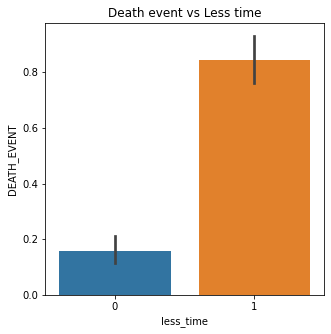

In [50]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Less time')
sns.barplot(df.less_time, df.DEATH_EVENT)

### Serum sodium

In [51]:
df['low_serum_sodium'] = df.serum_sodium.map(lambda x: 1 if x<134 else 0)

In [52]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,senior_citizen,less_time,low_serum_sodium
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0,1,1


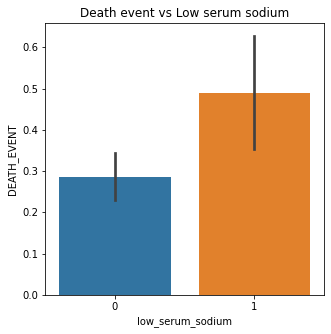

In [53]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Low serum sodium')
sns.barplot(df.low_serum_sodium, df.DEATH_EVENT)

### Ejection fraction

In [54]:
df['low_ejection_fraction'] = df.ejection_fraction.map(lambda x: 1 if x<32 else 0)

In [55]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,senior_citizen,less_time,low_serum_sodium,low_ejection_fraction
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1,1,1,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0,1,0,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0,1,1,1


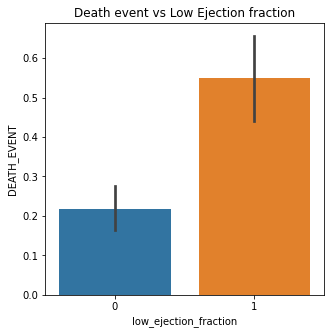

In [56]:
plt.figure(figsize=(5,5))
plt.title('Death event vs Low Ejection fraction')
sns.barplot(df.low_ejection_fraction, df.DEATH_EVENT)

### Feature selection

In [57]:
feature = ['senior_citizen', 'less_time', 'low_serum_sodium', 'low_ejection_fraction', 'anaemia', 'high_blood_pressure']

In [58]:
X = df[feature]
y = df['DEATH_EVENT']

In [59]:
X.head()

,senior_citizen,less_time,low_serum_sodium,low_ejection_fraction,anaemia,high_blood_pressure
0,1,1,1,1,0,1
1,0,1,0,0,0,0
2,0,1,1,1,0,0
3,0,1,0,1,1,0
4,0,1,1,1,1,0


In [60]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

## Modelling

In [61]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### Logistic regression

In [68]:
clf = LogisticRegressionCV(cv=10, random_state=0)

In [69]:
clf.fit(X,y)

LogisticRegressionCV(cv=10, random_state=0)

In [70]:
clf.score(X,y)

0.8461538461538461

### Random Forest Classifier

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [78]:
classifier = RandomForestClassifier()

In [80]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [81]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [82]:
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [83]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

## Generate pickel file

In [84]:
import pickle
file = open('rf_random_heart_prediction.pkl', 'wb')
pickle.dump(clf, file)